# Sentiment Analysis with NLTK
We will read a text file and clean it up to ensure that it is in lower case and puncuations dont intterupt the flow.

In [1]:
import string
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [2]:
text = open('read.txt', encoding = 'utf-8').read()
lower_case = text.lower()

#converting the string to a string without the punctuations 
# done with funct str.maketrans(chars to replace,chars to replace with,chars to be deleted)
cleaned_text = lower_case.translate(str.maketrans('','',string.punctuation))
print(cleaned_text)

i have been feeling very angry at myself quite often


Tokenization to break sentence into seperate words and stored in a list

In [4]:
# Using word_tokenize because it's faster than split()
tokenized_words = word_tokenize(cleaned_text, "english")
print (tokenized_words)

['i', 'have', 'been', 'feeling', 'very', 'angry', 'at', 'myself', 'quite', 'often']


Remove stop words that do not add meaning to the sentence

In [6]:
final_words = []
for word in tokenized_words:
    if word not in stopwords.words('english'):
        final_words.append(word)
        
print(final_words)

['feeling', 'angry', 'quite', 'often']


In [8]:
# Lemmatization - From plural to single + Base form of a word (example better-> good)
lemma_words = []
for word in final_words:
    word = WordNetLemmatizer().lemmatize(word)
    lemma_words.append(word)
    
print(lemma_words)

['feeling', 'angry', 'quite', 'often']


NLP emotion recognition

In [9]:
emotion_list = []
with open('emotions.txt', 'r') as file:
    for line in file:
        clear_line = line.replace("\n", '').replace(",", '').replace("'", '').strip()
        word, emotion = clear_line.split(':')

        if word in lemma_words:
            emotion_list.append(emotion)

How many times is the emotion being repeated in sentance

In [10]:
print(emotion_list)
w = Counter(emotion_list)
print(w)

[' angry']
Counter({' angry': 1})


In [11]:
def sentiment_analyse(sentiment_text):
    score = SentimentIntensityAnalyzer().polarity_scores(sentiment_text)
    if score['neg'] > score['pos']:
        print("Negative Sentiment")
    elif score['neg'] < score['pos']:
        print("Positive Sentiment")
    else:
        print("Neutral Sentiment")

Negative Sentiment


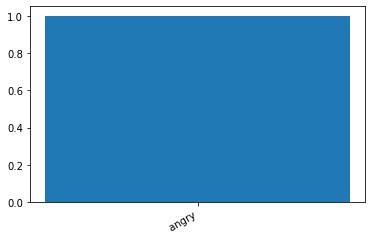

In [12]:
sentiment_analyse(cleaned_text)

fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
#plt.savefig('graph.png')
plt.show()